<a href="https://colab.research.google.com/github/patil202/Python_Data-Analysis-Projects/blob/main/netflix_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shivamb_netflix_shows_path = kagglehub.dataset_download('shivamb/netflix-shows')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
dataset = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
dataset.shape

(8807, 12)

In [ ]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Filling missing director names with "Unknown" to keep column complete and readable.
dataset['director'] = dataset['director'].fillna("Unknown")

# Filling missing cast with "Unknown" to avoid blanks and maintain consistency
dataset['cast'] = dataset['cast'].fillna("Unknown")

# Filling missing country with "Unknown" so data stays uniform and clear
dataset['country'] = dataset['country'].fillna("Unknown")

In [ ]:
dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Filling missing values with most frequent values for uniformity

dataset['date_added'] = dataset['date_added'].fillna(dataset['date_added'].mode()[0])
dataset['rating'] = dataset['rating'].fillna(dataset['rating'].mode()[0])
dataset['duration'] = dataset['duration'].fillna(dataset['duration'].mode()[0])

In [ ]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
dataset['duration'].head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [ ]:
# Extract unit (e.g., "min", "Season") from duration string, keeping consistency in units
dataset['duration_str'] = dataset['duration'].str.extract(r"(\D+)$")

# Extracting numeric part (like 90 or 2) for analysis as float
dataset['duration_int'] = dataset['duration'].str.extract(r"(\d+)").astype("float")

In [ ]:
dataset['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [ ]:
# Converting date_added to proper datetime format; invalid entries become NaT
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce')

In [ ]:
dataset['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [ ]:
# Extracting year and month from date_added for time-based analysis
dataset["date_Year"] = dataset['date_added'].dt.year
dataset["date_month"] = dataset['date_added'].dt.month

In [ ]:
# Splitting cast names into a list for easier access and analysis
dataset['cast'] = dataset['cast'].str.split(', ')

In [ ]:
# Split genres into list and expand rows so each genre has its own row
dataset['genres_list'] = dataset['listed_in'].str.split(', ')
dataset_exploded = dataset.explode('genres_list')

In [ ]:
dataset.shape

(8807, 17)

In [ ]:
dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_str,duration_int,date_Year,date_month,genres_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",min,90.0,2021.0,9.0,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Seasons,2.0,2021.0,9.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Season,1.0,2021.0,9.0,"[Crime TV Shows, International TV Shows, TV Ac..."


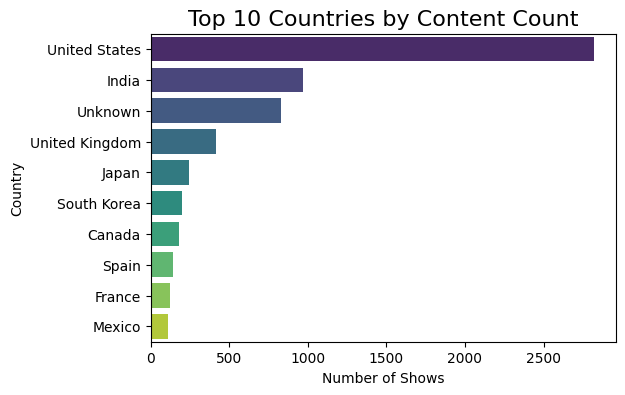

In [ ]:
# Plotting a bar chart to show top 10 countries with the most content for quick comparison
top_countries = dataset['country'].value_counts().head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Content Count", fontsize=16)
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


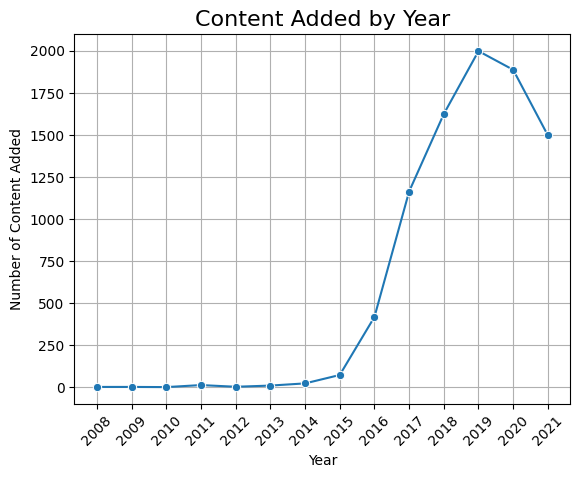

In [ ]:
# Plotting a line chart to show how content production has changed over the years
year_counts = dataset['date_Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title("Content Added by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Content Added")
plt.xticks(year_counts.index, rotation=45)
plt.grid(True)
plt.show()

# Warnings Remove
# Convert inf values to NaN manually since 'use_inf_as_na' is deprecated
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
# Creating a pie chart to visualize the share of Movies vs TV Shows in the dataset

fig = px.pie(dataset, names='type', title='Content Type Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
import plotly.express as px

fig = px.pie(
    dataset,
    names='type',
    title='Content Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()


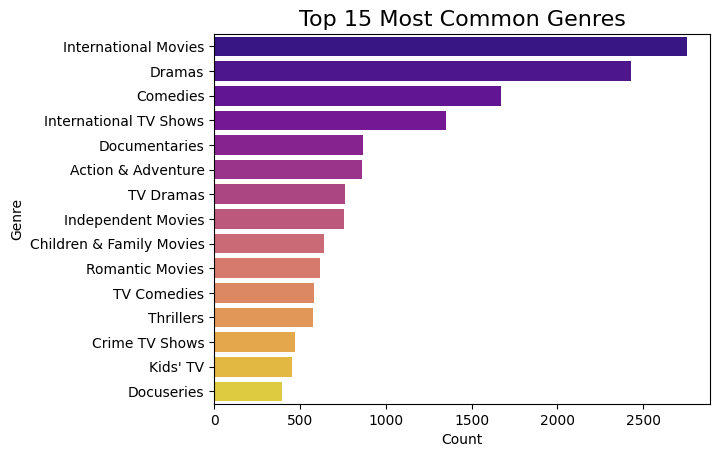

In [ ]:
# Creating a bar chart to show the 15 most frequent genres across all content.
# Helps identify viewer preferences and dominant content types on the platform.

from collections import Counter
genres = dataset['genres_list'].explode()
top_genres = pd.Series(Counter(genres)).sort_values(ascending=False).head(15)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="plasma")
plt.title("Top 15 Most Common Genres", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

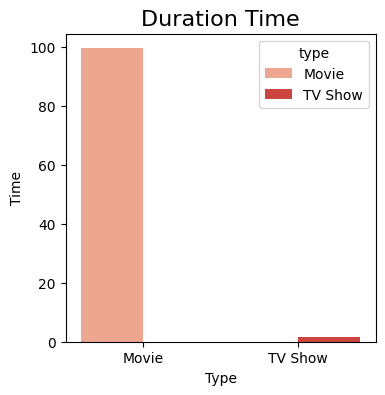

In [ ]:
# Bar chart comparing average duration of Movies vs TV Shows.
plt.figure(figsize=(4,4))
sns.barplot(x="type", y="duration_int", hue="type", data=dataset, palette="Reds",  errorbar=None)
plt.title("Duration Time", fontsize=16 )
plt.xlabel("Type")
plt.ylabel("Time")
plt.show()

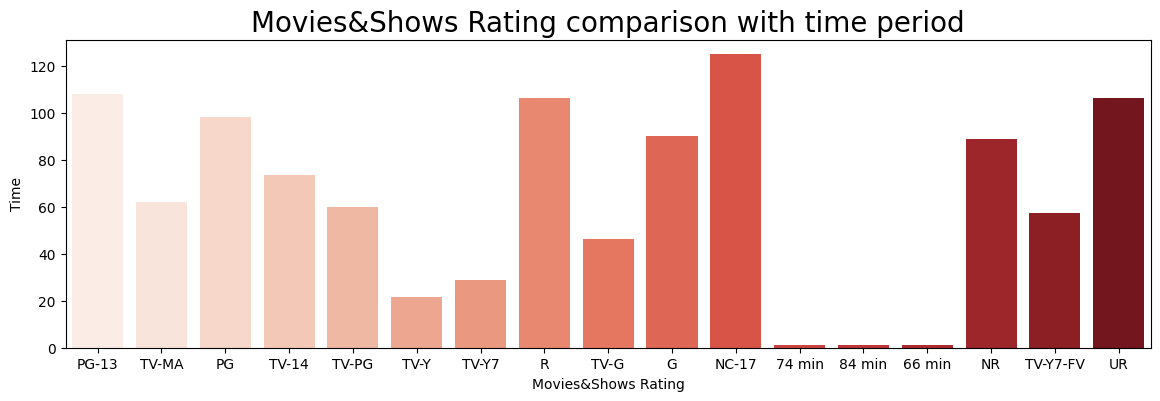

In [ ]:
# Bar chart showing how average content duration varies across different ratings.
# Helps analyze whether rating categories are linked to longer or shorter content.
plt.figure(figsize=(14,4))
sns.barplot(x="rating", y="duration_int",  data=dataset, palette="Reds",  errorbar=None)
plt.title("Movies&Shows Rating comparison with time period", fontsize=20)
plt.xlabel("Movies&Shows Rating")
plt.ylabel("Time")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



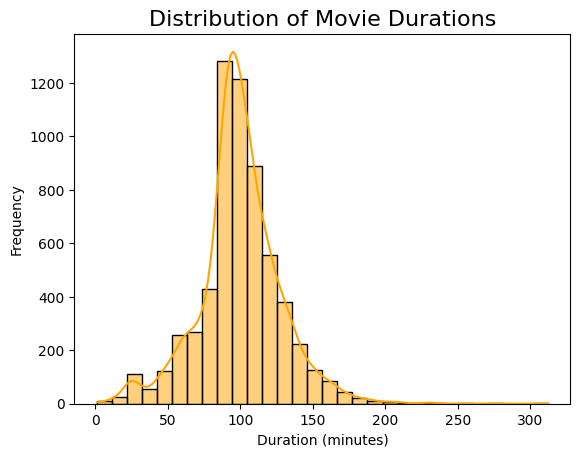

In [ ]:
# Histogram showing how movie durations are distributed across the dataset.
sns.histplot(data=dataset[dataset['type'] == 'Movie'], x='duration_int',bins=30,  kde=True, color='orange')
plt.title("Distribution of Movie Durations", fontsize=16)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



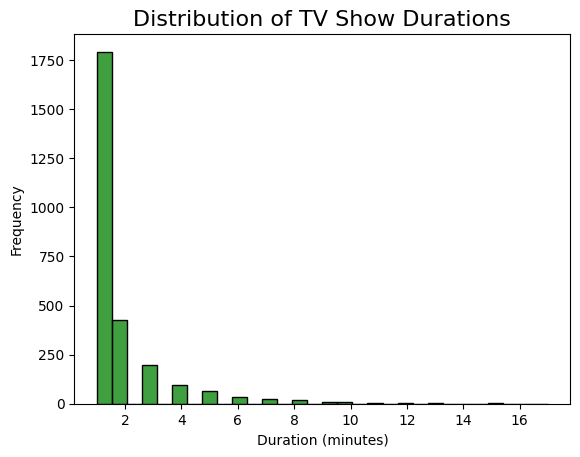

In [ ]:
# Histogram showing how TV Shows durations are distributed across the dataset.
sns.histplot(data=dataset[dataset['type'] == 'TV Show'], x='duration_int', bins=30, color='green')
plt.title("Distribution of TV Show Durations", fontsize=16)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Grouping ratings into broader audience categories: Kids, Teens, Adults, and Other.
# Helps simplify analysis by combining similar rating types into meaningful groups.
rating_groups = {
    'G': 'Kids',
    'PG': 'Kids',
    'TV-Y': 'Kids',
    'TV-G': 'Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-MA': 'Adults'
}
dataset['rating_group'] = dataset['rating'].map(rating_groups).fillna('Other')

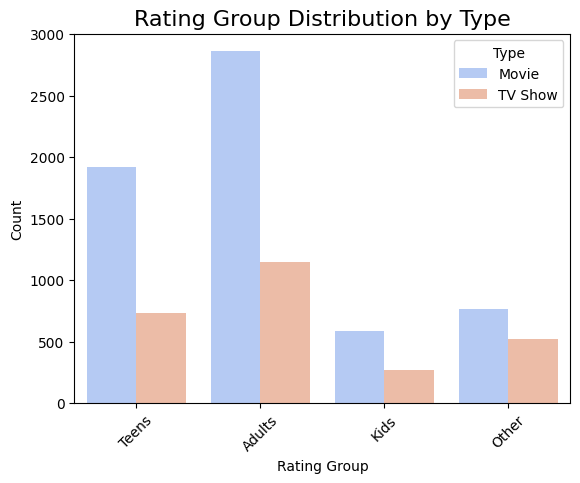

In [ ]:
# Comparing content types across audience rating groups using a count plot
sns.countplot(data=dataset, x='rating_group', hue='type', palette='coolwarm')
plt.title("Rating Group Distribution by Type", fontsize=16)
plt.xlabel("Rating Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

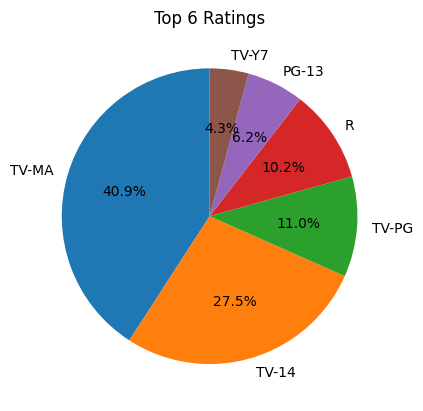

In [ ]:
# Showing the percentage distribution of the top 6 most common content ratings
rating_counts = dataset['rating'].value_counts().nlargest(6)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 6 Ratings")
plt.show()


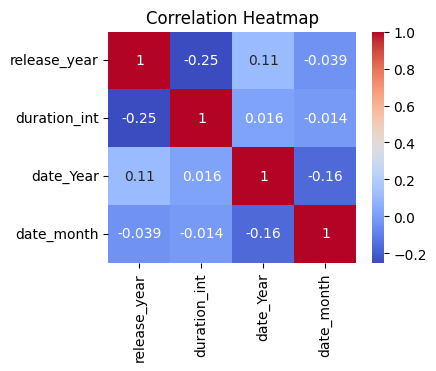

In [ ]:
# Displaying correlations between numeric features to explore relationships in the data

corr = dataset[['release_year', 'duration_int', 'date_Year', 'date_month']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Completed a comprehensive analysis of Netflix content based on country, genre, type, and ratings.
# Visualized key trends and patterns to understand viewer focus and platform distribution.
# This end-to-end exploration offers valuable insights using clear and simple visual storytelling.
